## Домашнее задание "Продвинутая линейная алгебра".

Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [1]:
import numpy as np

In [2]:
# поскольку определитель ортогональной матрицы должен быть +-1, тут немного варантов для диагональной матрицы, которая не единичная
a = np.array([[1, 0],
              [0, -1]])
a

array([[ 1,  0],
       [ 0, -1]])

In [3]:
#ортогональная матрица при умножении на такую же транспонированную должна давать единичную, проверим
a_trans = a.T
a_trans

array([[ 1,  0],
       [ 0, -1]])

In [4]:
result = np.dot(a, a_trans)
result

array([[1, 0],
       [0, 1]])

b и c варианты невозможны 

In [11]:
# Матрица, у которой определитель = 1, и все элементы не равны 0
d = np.array([[1, 2],
              [1, 3]])
d

array([[1, 2],
       [1, 3]])

In [12]:
np.linalg.det(d)

1.0

Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])

print(m)

In [14]:
m = np.array([[2, 2],
              [1, 3]])
m

array([[2, 2],
       [1, 3]])

In [25]:
w, v = np.linalg.eig(m)
print('Собственное значение', w[0])
print('Его собственный вектор', v[0])
print('Собственное значение', w[1])
print('Его собственный вектор', v[1])

Собственное значение 1.0
Его собственный вектор [-0.89442719 -0.70710678]
Собственное значение 4.0
Его собственный вектор [ 0.4472136  -0.70710678]


Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])
print(m)

Спектральное разложение матрицы или разложение матрицы на основе собственных векторов — это представление квадратной матрицы A в виде произведения трёх матриц, A=V*Lambda*V^{-1}, где V — матрица, столбцы которой являются собственными векторами матрицы A, Lambda  — диагональная матрица с соответствующими собственными значениями на главной диагонали, V^{-1} — матрица, обратная матрице V 

In [26]:
m = np.array([[1, 2],
              [2, 3]])
m

array([[1, 2],
       [2, 3]])

In [27]:
w, v = np.linalg.eig(m)

In [28]:
print('Собственное значение', w[0])
print('Его собственный вектор', v[0])
print('Собственное значение', w[1])
print('Его собственный вектор', v[1])

Собственное значение -0.2360679774997898
Его собственный вектор [-0.85065081 -0.52573111]
Собственное значение 4.23606797749979
Его собственный вектор [ 0.52573111 -0.85065081]


In [36]:
# матрица, столбцы которой являются собственными векторами матрицы m
v

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [32]:
# создаем обратную матрицу v
v_inv = np.linalg.inv(v)
v_inv

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [33]:
# создаем матрицу с соответствующими собственными значениями на главной диагонали
w_diag = np.diag(w)
w_diag

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [35]:
# проверяем произведение
result = np.dot(v,(np.dot(w_diag, v_inv)))
result

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [37]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [38]:
# загружаем цифры
X, y = load_digits(return_X_y=True)

In [39]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [44]:
# посмотрим сколько у нас записей
X.shape

(1797, 64)

In [53]:
# считаем ошибки по компонентам
list_mean_squared_error = []
for i in range(1, (X.shape[1]+1)):
    pca = PCA(n_components=i)
    pca.fit(X)
    Z = pca.inverse_transform(pca.transform(X)) 
    list_mean_squared_error.append(mean_squared_error(X,Z))
    
list_mean_squared_error[:10]

[15.977678462234511,
 13.421012200761481,
 11.20680069712919,
 9.627986407130972,
 8.542447615101233,
 7.619390865191126,
 6.809146490719349,
 6.121814076413789,
 5.492296351439661,
 4.914301478712657]

In [54]:
# построим график зависимости ошибок от количества компонент в PCA
from matplotlib import pyplot as plt

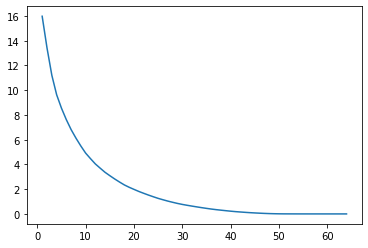

In [55]:
plt.plot(range(1, (X.shape[1]+1)),list_mean_squared_error)
plt.show()

ошибки прогрессивно снижаются с увеличением количества компонент в PCA, что логично